In [52]:
import pandas as pd
import numpy as np
import pandas as pd
import warnings
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.utils import resample

warnings.filterwarnings('ignore') #ignore warning messages 

In [208]:
data = pd.read_csv('breast-cancer.csv')

In [209]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [210]:
data.duplicated().sum()

0

In [211]:
data.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [212]:
data.head()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  radius_worst  texture_worst  perimeter_worst  area_worst  \
0  ...         25.38          17.33           184.60      2019.0   
1  ...         24.99          23.41           158.80      1956.0   
2  ...         23.57          25.53           152.50      1709.0   
3  ...         14.91          26.50            98.87       567.7   
4  ...         22.54          16.67           152.20      1575.0   

   smoothness_worst  compactness_worst  concavity_worst  concave points_worst  \
0            0.1622             0.6656           0.7119                0.2654   
1            0.1238             0.1866           0.2416                0.1860   
2            0.1444             0.4245           0.4504                0.2430   
3            0.2098             0.8663           0.6869                0.2575   
4            0.1374             0.2050           0.4000                0.1625   

   symmetry_worst  fractal_dimension_worst  
0          0.4601                  0.11890  
1          0.2750                  0.08902  
2          0.3613                  0.08758  
3          0.6638                  0.17300  
4          0.2364                  0.07678  

[5 rows x 32 columns]

In [213]:
data.diagnosis.replace(to_replace= dict(M=1, B=0), inplace = True)

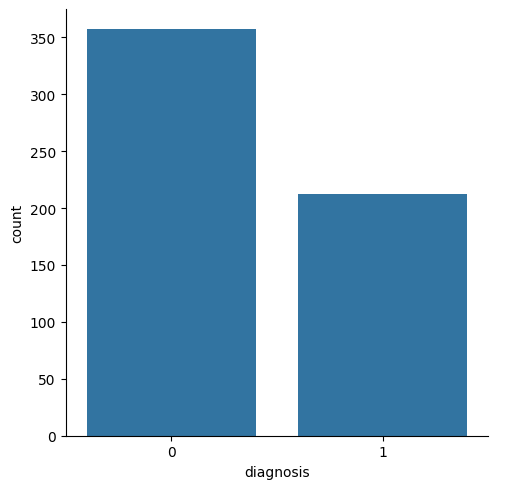

In [214]:
sns.catplot(data=data, x="diagnosis", kind="count")

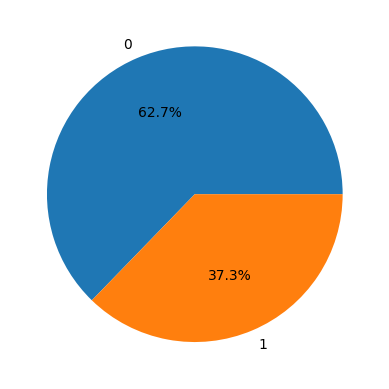

In [215]:
diagnosis_counts = data["diagnosis"].value_counts()
plt.pie(diagnosis_counts, labels=diagnosis_counts.index, autopct='%1.1f%%')
plt.show()

In [61]:
M = data[data.diagnosis == 1]
B = data[data.diagnosis == 0]
min_size = min(len(M), len(B))
M_down = resample(M, n_samples=min_size, random_state=42)
B_down = resample(B, n_samples=min_size, random_state=42)
data = pd.concat([M_down, B_down])

data.diagnosis.value_counts()

diagnosis
1    212
0    212
Name: count, dtype: int64

<Axes: >

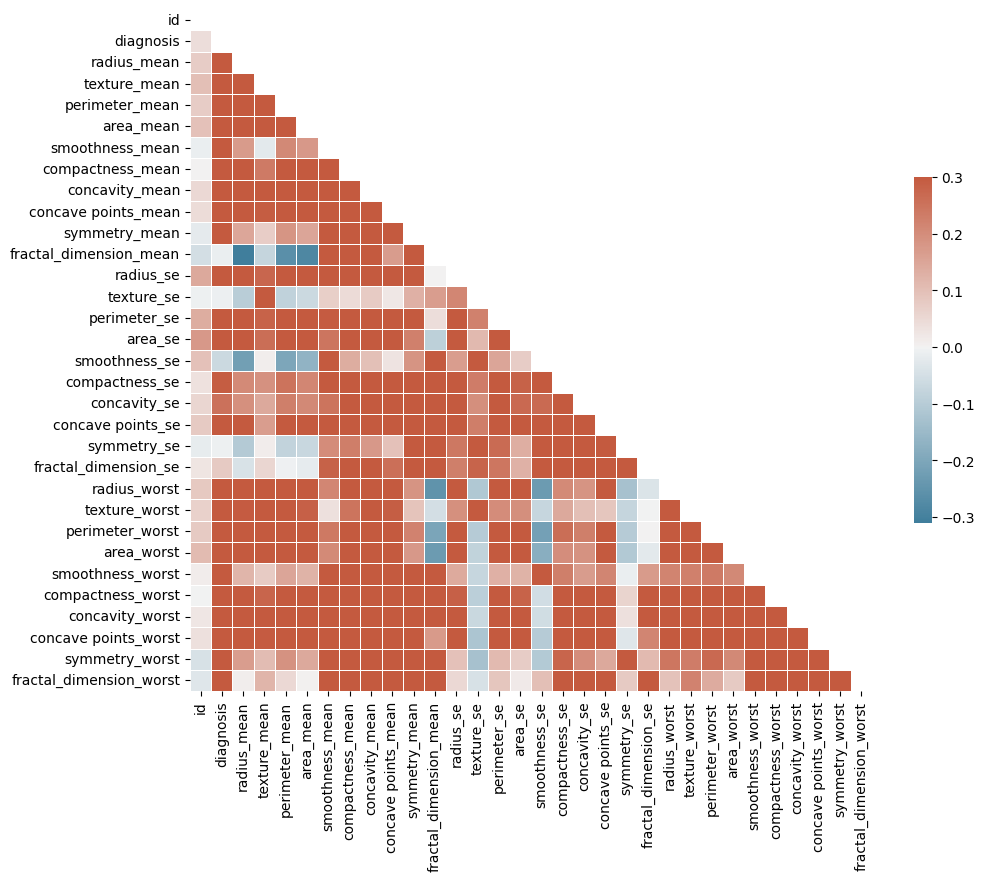

In [216]:
corr = data.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

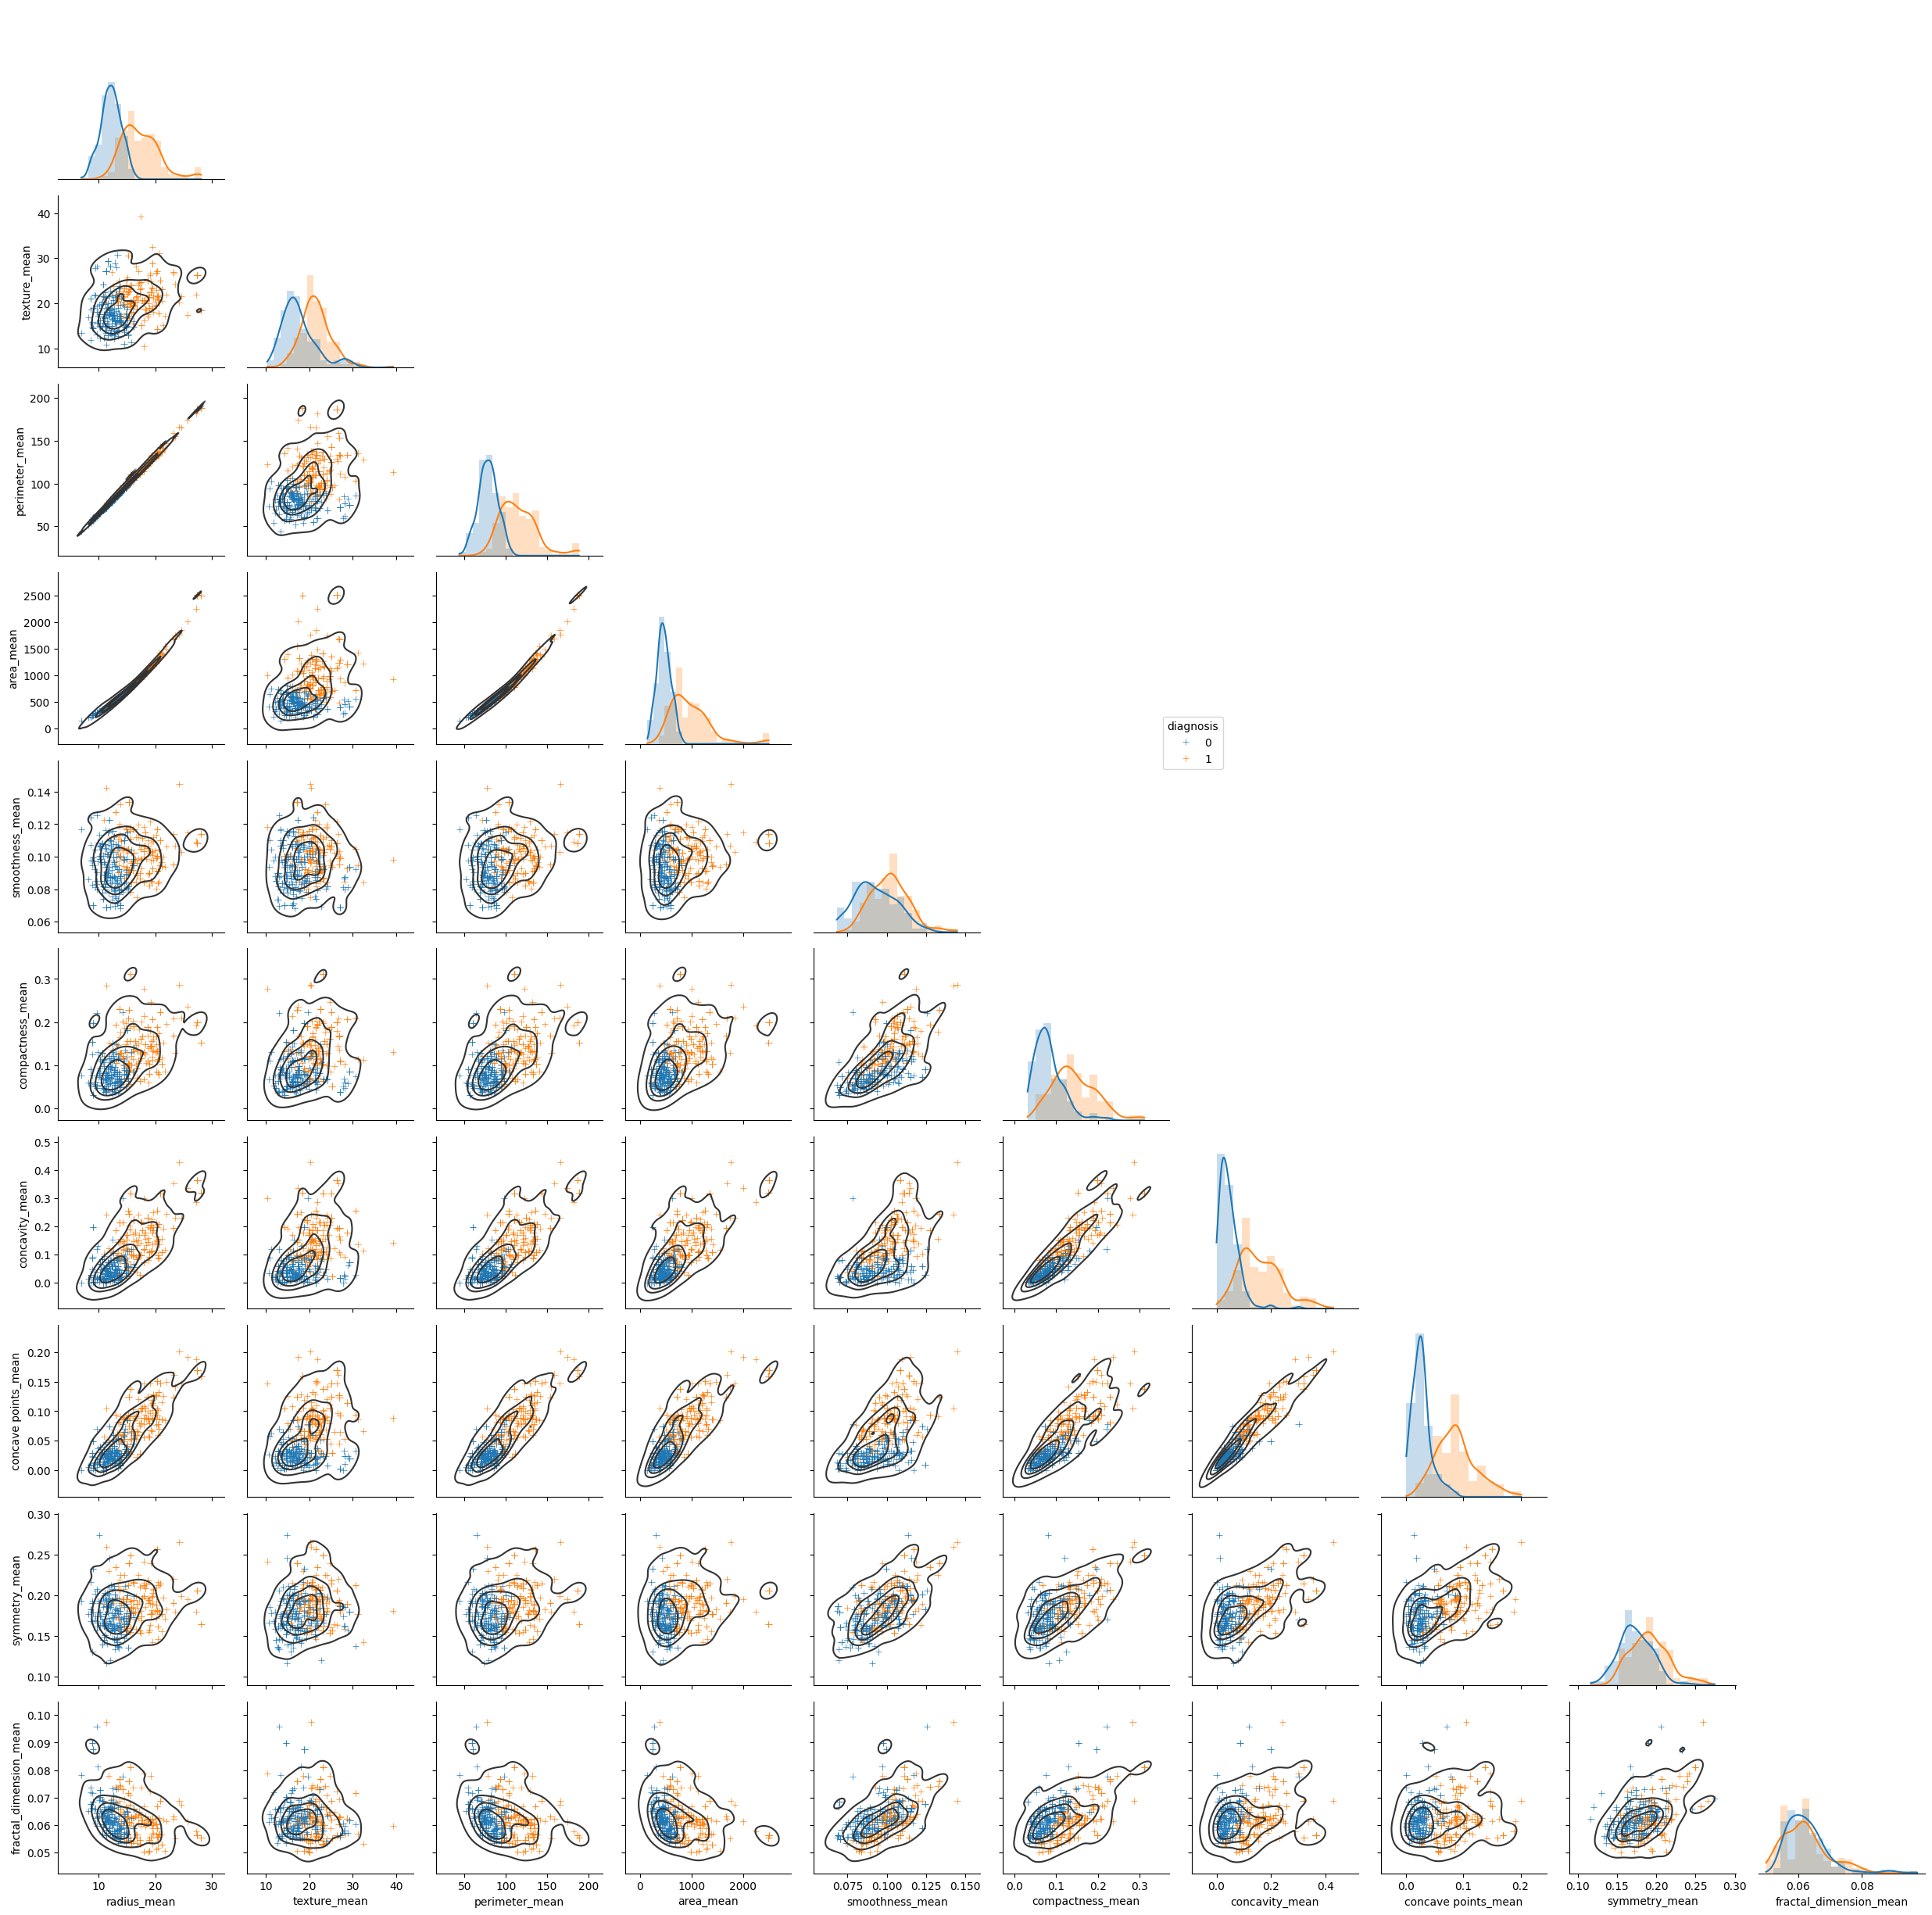

In [72]:
mean = data[["diagnosis","radius_mean","texture_mean","perimeter_mean","area_mean","smoothness_mean","compactness_mean","concavity_mean","concave points_mean","symmetry_mean","fractal_dimension_mean"]]
g = sns.PairGrid(mean, hue="diagnosis", corner=True)
g.map_lower(sns.kdeplot, hue=None, levels=5, color=".2")
g.map_lower(sns.scatterplot, marker="+")
g.map_diag(sns.histplot, element="step", linewidth=0, kde=True)
g.add_legend(frameon=True)
g.legend.set_bbox_to_anchor((.61, .6))

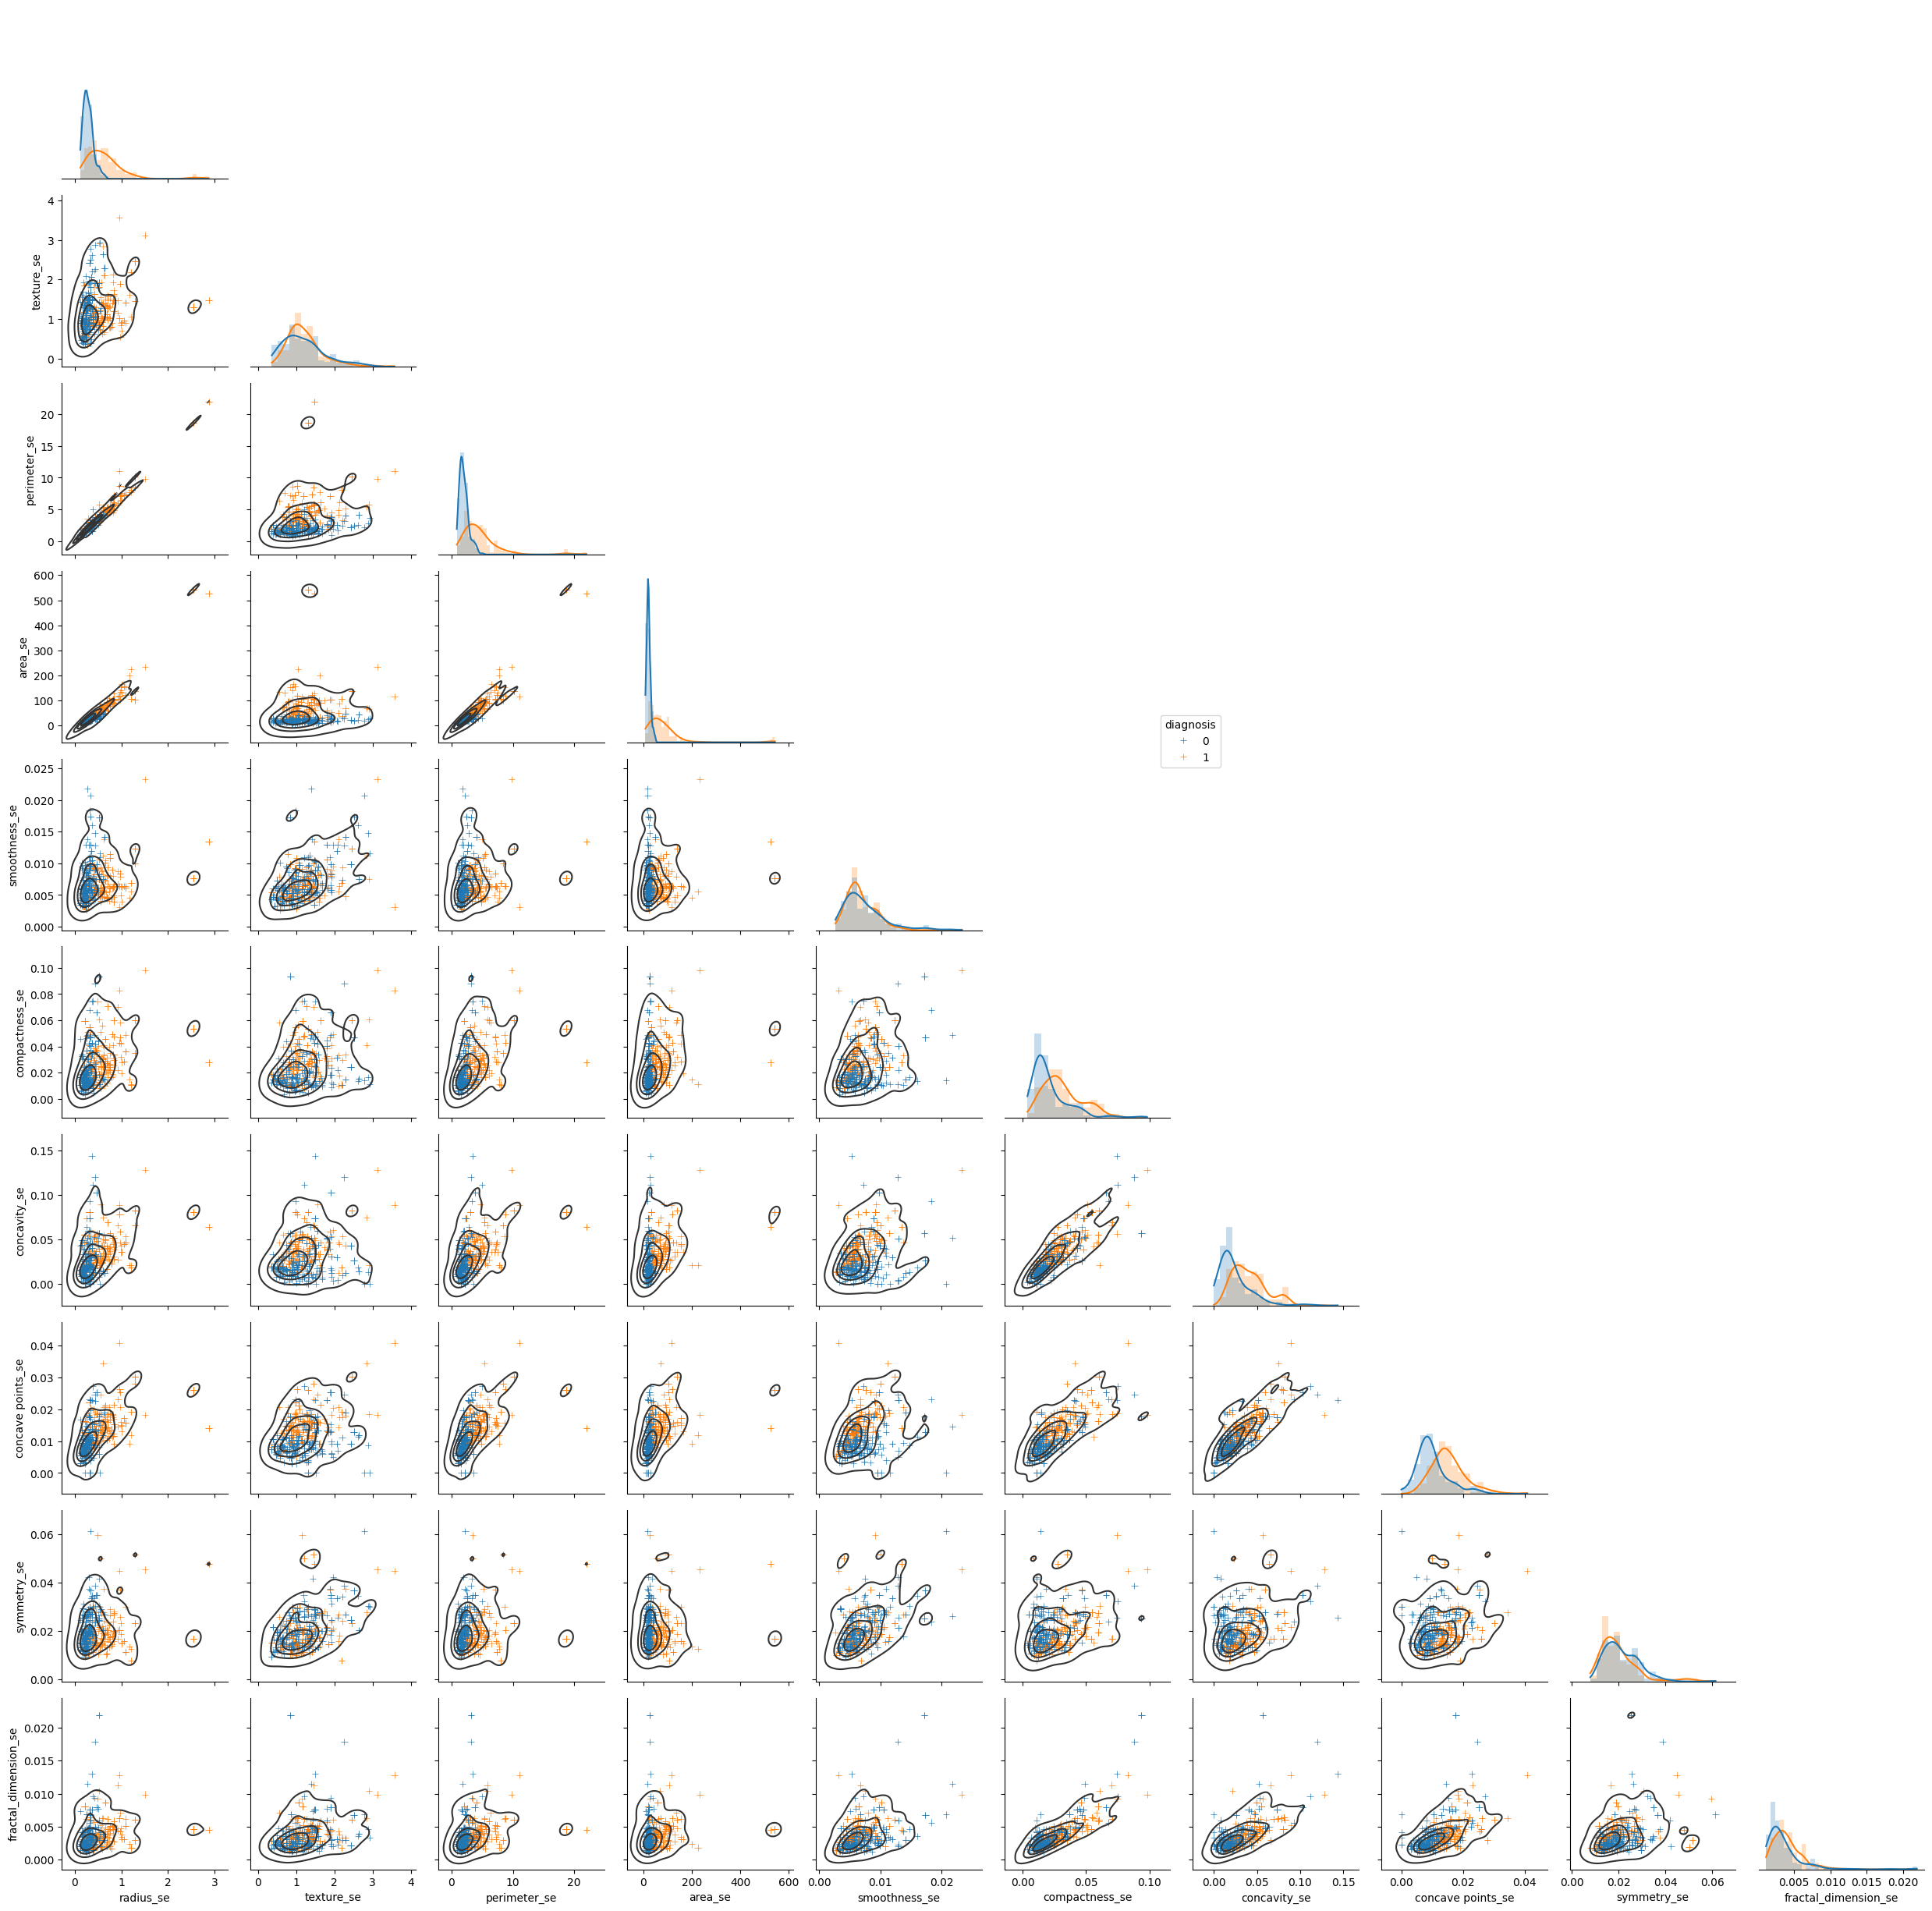

In [73]:
mean = data[["diagnosis","radius_se","texture_se","perimeter_se","area_se","smoothness_se","compactness_se","concavity_se","concave points_se","symmetry_se","fractal_dimension_se"]]
g = sns.PairGrid(mean, hue="diagnosis", corner=True)
g.map_lower(sns.kdeplot, hue=None, levels=5, color=".2")
g.map_lower(sns.scatterplot, marker="+")
g.map_diag(sns.histplot, element="step", linewidth=0, kde=True)
g.add_legend(frameon=True)
g.legend.set_bbox_to_anchor((.61, .6))

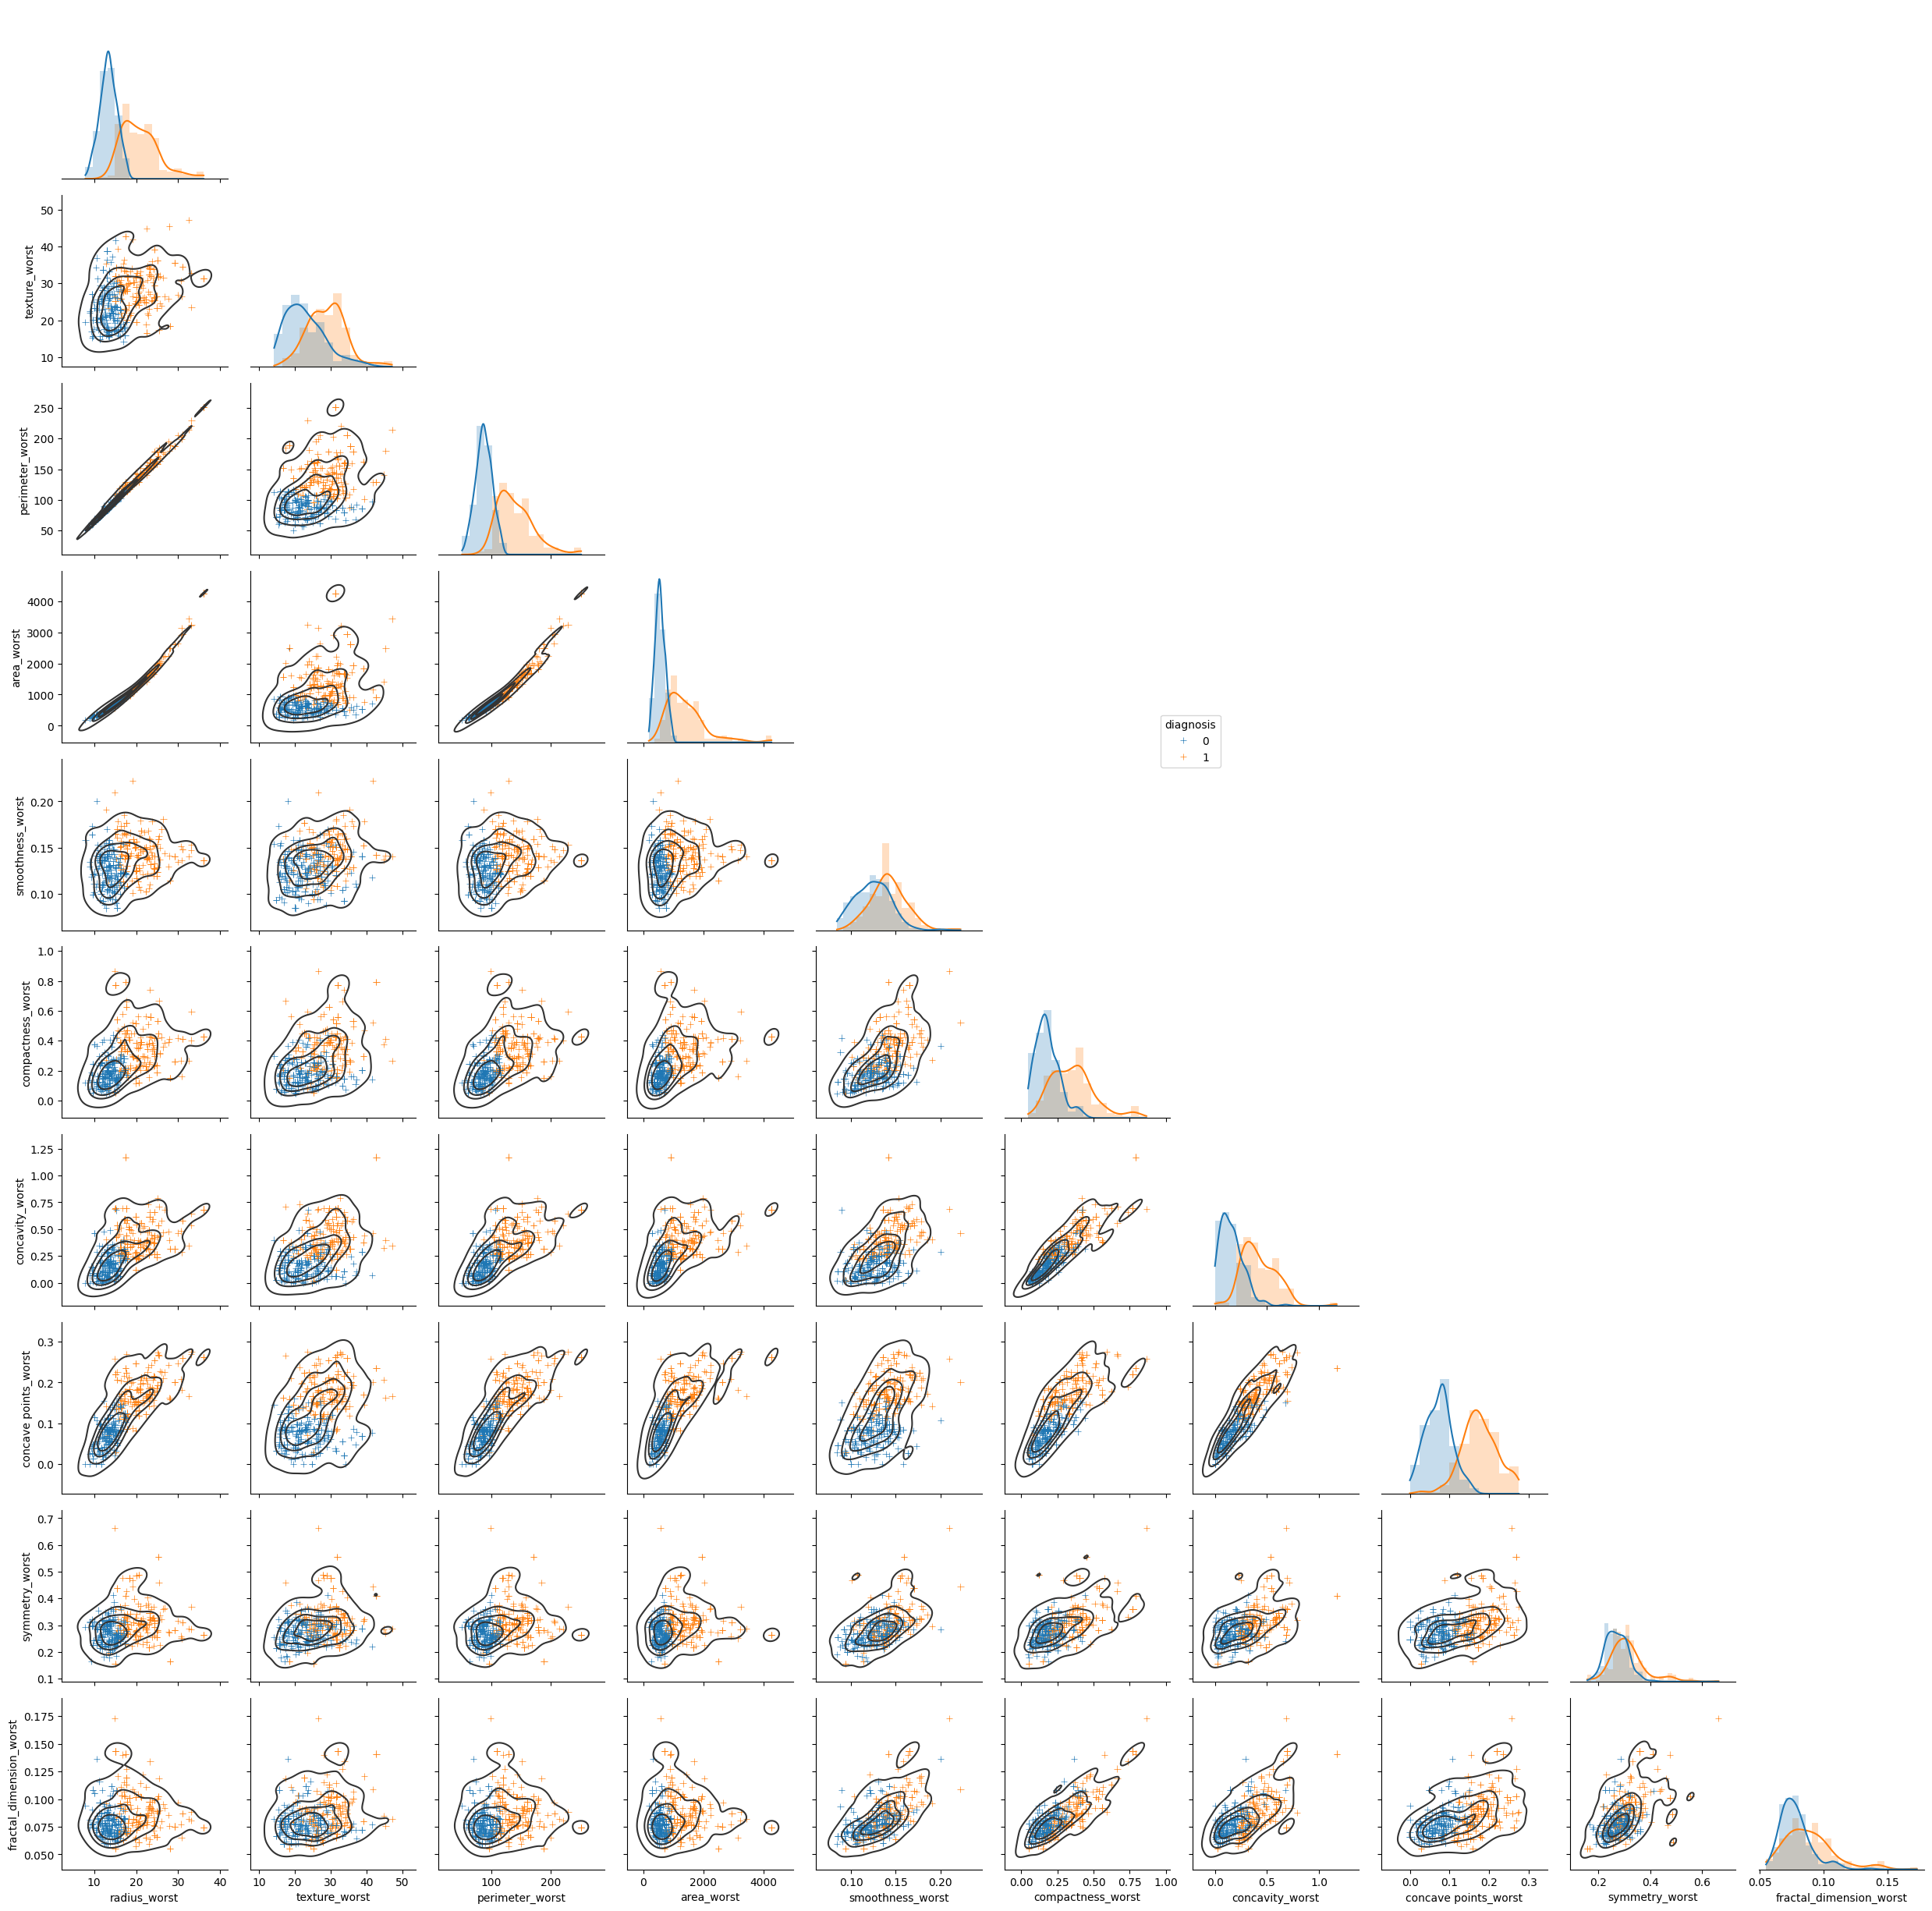

In [74]:
mean = data[["diagnosis","radius_worst","texture_worst","perimeter_worst","area_worst","smoothness_worst","compactness_worst","concavity_worst","concave points_worst","symmetry_worst","fractal_dimension_worst"]]
g = sns.PairGrid(mean, hue="diagnosis", corner=True)
g.map_lower(sns.kdeplot, hue=None, levels=5, color=".2")
g.map_lower(sns.scatterplot, marker="+")
g.map_diag(sns.histplot, element="step", linewidth=0, kde=True)
g.add_legend(frameon=True)
g.legend.set_bbox_to_anchor((.61, .6))

In [217]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
target_pca = data['diagnosis']
data_pca = data.drop(['diagnosis', 'id'], axis=1)

target_pca = pd.DataFrame(target_pca)

#To make a PCA, normalize data is essential
X_pca = data_pca.values
X_std = StandardScaler().fit_transform(X_pca)

pca = PCA(svd_solver='full')
pca_std = pca.fit(X_std, target_pca).transform(X_std)

pca_std = pd.DataFrame(pca_std)
pca_std = pca_std.merge(target_pca, left_index = True, right_index = True, how = 'left')
pca_std['diagnosis'] = pca_std['diagnosis'].replace({1:'malignant',0:'benign'})

In [218]:
data_pca

radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0             0.27760         0.30010              0.14710         0.2419   
1             0.07864         0.08690              0.07017         0.1812   
2             0.15990         0.19740              0.12790         0.2069   
3             0.28390         0.24140              0.10520         0.2597   
4             0.13280         0.19800              0.10430         0.1809   
..                ...             ...                  ...            ...   
564           0.11590         0.24390              0.13890         0.1726   
565           0.10340         0.14400              0.09791         0.1752   
566           0.10230         0.09251              0.05302         0.1590   
567           0.27700         0.35140              0.15200         0.2397   
568           0.04362         0.00000              0.00000         0.1587   

     fractal_dimension_mean  ...  radius_worst  texture_worst  \
0                   0.07871  ...        25.380          17.33   
1                   0.05667  ...        24.990          23.41   
2                   0.05999  ...        23.570          25.53   
3                   0.09744  ...        14.910          26.50   
4                   0.05883  ...        22.540          16.67   
..                      ...  ...           ...            ...   
564                 0.05623  ...        25.450          26.40   
565                 0.05533  ...        23.690          38.25   
566                 0.05648  ...        18.980          34.12   
567                 0.07016  ...        25.740          39.42   
568                 0.05884  ...         9.456          30.37   

     perimeter_worst  area_worst  smoothness_worst  compactness_worst  \
0             184.60      2019.0           0.16220            0.66560   
1             158.80      1956.0           0.12380            0.18660   
2             152.50      1709.0           0.14440            0.42450   
3              98.87       567.7           0.20980            0.86630   
4             152.20      1575.0           0.13740            0.20500   
..               ...         ...               ...                ...   
564           166.10      2027.0           0.14100            0.21130   
565           155.00      1731.0           0.11660            0.19220   
566           126.70      1124.0           0.11390            0.30940   
567           184.60      1821.0           0.16500            0.86810   
568            59.16       268.6           0.08996            0.06444   

     concavity_worst  concave points_worst  symmetry_worst  \
0             0.7119                0.2654          0.4601   
1             0.2416                0.1860          0.2750   
2             0.4504                0.2430          0.3613   
3             0.6869                0.2575          0.6638   
4             0.4000                0.1625          0.2364   
..               ...                   ...             ...   
564           0.4107                0.2216         

In [219]:
from itertools import chain
var_pca = pd.DataFrame(pca.explained_variance_ratio_)
var_pca = var_pca.T

#----------SUM AND DROP COMP [7:30]
col_list = list(v for v in chain(pca_std.columns[6:30])) 
var_pca['OTHERS_COMP'] = var_pca[col_list].sum(axis=1)
var_pca.drop(var_pca[col_list],axis=1,inplace=True)
var_pca = var_pca.T

In [220]:
import plotly.graph_objs as go
import plotly.offline as py

labels = ['COMP1','COMP2','COMP3','COMP4','COMP5','COMP6', 'COMP7 - 30']
colors = ['gold', 'lightgreen', 'lightcoral', 'lightskyblue', 'lightgrey', 'orange', 'white']

trace = go.Pie(labels = labels, values = var_pca[0].values, opacity = 0.8,
               textfont=dict(size=15),
               marker=dict(colors=colors, 
                           line=dict(color='#000000', width=1.5)))


layout = dict(title =  'PCA : components and explained variance (6 comp = 88.8%)')
 
                   
fig = dict(data = [trace], layout=layout)
py.iplot(fig)

In [221]:
pca_std

0          1         2         3         4         5         6  \
0     9.192837   1.948583 -1.123166 -3.633731  1.195110  1.411424  2.159370   
1     2.387802  -3.768172 -0.529293 -1.118264 -0.621775  0.028656  0.013358   
2     5.733896  -1.075174 -0.551748 -0.912083  0.177086  0.541452 -0.668166   
3     7.122953  10.275589 -3.232790 -0.152547  2.960878  3.053422  1.429911   
4     3.935302  -1.948072  1.389767 -2.940639 -0.546747 -1.226495 -0.936213   
..         ...        ...       ...       ...       ...       ...       ...   
564   6.439315  -3.576817  2.459487 -1.177314  0.074824 -2.375193 -0.596130   
565   3.793382  -3.584048  2.088476  2.506028  0.510723 -0.246710 -0.716326   
566   1.256179  -1.902297  0.562731  2.089227 -1.809991 -0.534447 -0.192758   
567  10.374794   1.672010 -1.877029  2.356031  0.033742  0.567936  0.223082   
568  -5.475243  -0.670637  1.490443  2.299157  0.184703  1.617837  1.698952   

            7         8         9  ...        21        22        23  \
0   -0.398407 -0.157118 -0.877402  ... -0.068850 -0.084519 -0.175256   
1    0.240988 -0.711905  1.106995  ...  0.094578  0.217718  0.011290   
2    0.097374  0.024066  0.454275  ...  0.060309  0.074291  0.102762   
3    1.059565 -1.405440 -1.116975  ...  0.203266  0.124105  0.153430   
4    0.636376 -0.263805  0.377704  ...  0.017650 -0.139454 -0.005332   
..        ...       ...       ...  ...       ...       ...       ...   
564 -0.035471  0.987929  0.256989  ...  0.067000 -0.088590  0.107898   
565 -1.113360 -0.105207 -0.108632  ... -0.019563  0.055405  0.086135   
566  0.341887  0.393917  0.520877  ... -0.063352  0.200312 -0.044819   
567 -0.280239 -0.542035 -0.089296  ...  0.042478 -0.168820 -0.195969   
568  1.046354  0.374101 -0.047726  ...  0.243238 -0.037915 -0.075111   

           24        25        26        27        28        29  diagnosis  
0   -0.151020  0.201503 -0.252585  0.033914 -0.045648  0.047169  malignant  
1   -0.170510  0.041129  0.181270 -0.032624  0.005687  0.001868  malignant  
2    0.171158 -0.004735  0.049569 -0.047026 -0.003146 -0.000751  malignant  
3    0.077496  0.275225  0.183462 -0.042484  0.069295  0.019937  malignant  
4    0.003062 -0.039254  0.032168  0.034786 -0.005038 -0.021214  malignant  
..        ...       ...       ...       ...       ...       ...        ...  
564  0.219520  0.122900  0.159198 -0.009853 -0.007119  0.001415  malignant  
565  0.001197 -0.065889 -0.068512  0.023575  0.027486  0.010419  malignant  
566  0.002429 -0.007095 -0.023691  0.002578 -0.006706 -0.003770  malignant  
567  0.377830  0.198192 -0.027409  0.068086  0.084163  0.023783  malignant  
568 -0.017508 -0.347115  0.127381  0.009516  0.060913  0.019476     benign  

[569 rows x 31 columns]

In [222]:
X_std

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

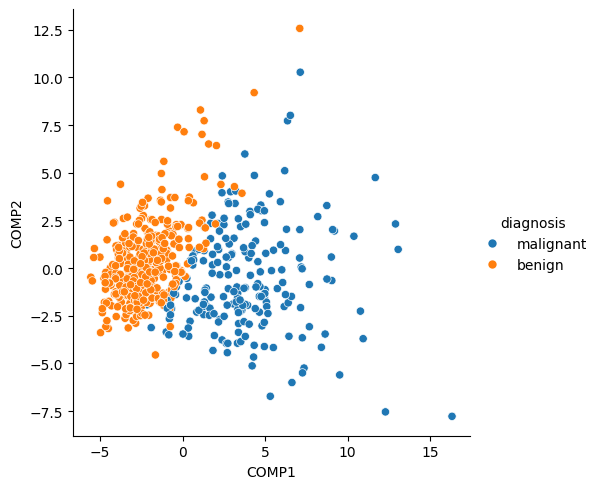

In [223]:
pca = PCA(n_components = 2)
pca_std = pca.fit(X_std, target_pca).transform(X_std)
pca_std = pd.DataFrame(pca_std,columns = ['COMP1','COMP2'])
pca_std = pca_std.merge(target_pca,left_index = True,right_index = True,how = 'left')
pca_std['diagnosis'] = pca_std['diagnosis'].replace({1:'malignant',0:'benign'})
sns.relplot(
    data=pca_std,
    x='COMP1', y='COMP2',
    hue="diagnosis"
)

In [224]:
import plotly.express as px
pca = PCA(n_components = 3)
pca_std = pca.fit(X_std, target_pca).transform(X_std)
pca_std = pd.DataFrame(pca_std,columns = ['COMP1','COMP2','COMP3'])
pca_std = pca_std.merge(target_pca,left_index = True,right_index = True,how = 'left')
pca_std['diagnosis'] = pca_std['diagnosis'].replace({1:'malignant',0:'benign'})
df = px.data.iris()
fig = px.scatter_3d(pca_std, x='COMP1', y='COMP2', z='COMP3',
              color='diagnosis')
fig.update_traces(marker=dict(size=3))
fig.show()

In [225]:
from sklearn.model_selection import train_test_split
X = data.drop(['id', 'diagnosis'], axis=1)
y = data.diagnosis

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<Axes: xlabel='LDA Component 1', ylabel='Class'>

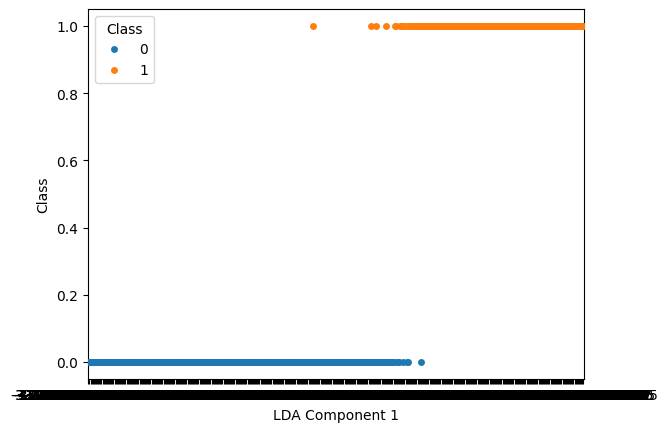

In [226]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
X = data.drop(['id', 'diagnosis'], axis=1)
y = data.diagnosis

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
# Apply Linear Discriminant Analysis
lda = LinearDiscriminantAnalysis(n_components=1)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)
tmp_Df = pd.DataFrame(X_train, columns=['LDA Component 1'])
tmp_Df = pd.DataFrame(X_train, columns=['LDA Component 1']).reset_index(drop=True)
tmp_Df['Class'] = y_train.reset_index(drop=True)

sns.stripplot(data=tmp_Df, x='LDA Component 1', y='Class', hue='Class')

In [227]:
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

def train(model, X_train, X_test, y_train, y_test):
    print(repr(model))
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    report = classification_report(y_test, y_pred, output_dict=True)

    print("Accuracy Score:", accuracy_score(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot(cmap='Blues')
    plt.title("Confusion Matrix")
    plt.show()
    print('-----------------------------------------------------------------------------------------------------------------------------')

HistGradientBoostingClassifier()
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.96      0.97        73
           1       0.93      0.95      0.94        41

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114

Accuracy Score: 0.956140350877193


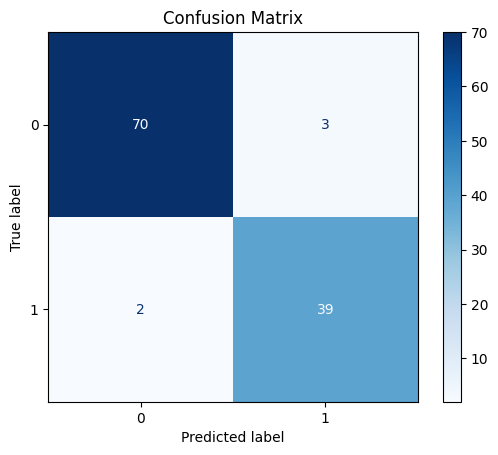

-----------------------------------------------------------------------------------------------------------------------------
RandomForestClassifier(max_depth=2, random_state=0)
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.96      0.97        73
           1       0.93      0.95      0.94        41

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114

Accuracy Score: 0.956140350877193


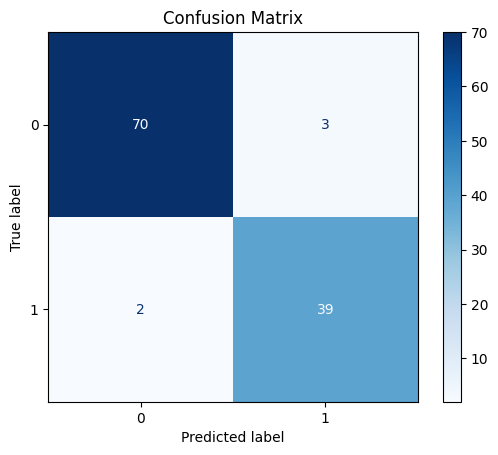

-----------------------------------------------------------------------------------------------------------------------------
LogisticRegression(max_iter=1000, random_state=0)
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        73
           1       0.93      0.93      0.93        41

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114

Accuracy Score: 0.9473684210526315


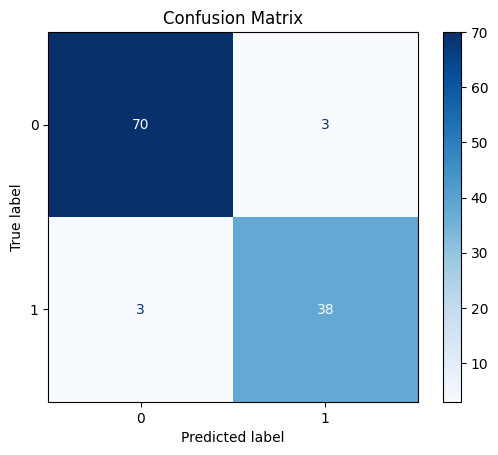

-----------------------------------------------------------------------------------------------------------------------------
SVC(kernel='linear')
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        73
           1       0.93      0.93      0.93        41

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114

Accuracy Score: 0.9473684210526315


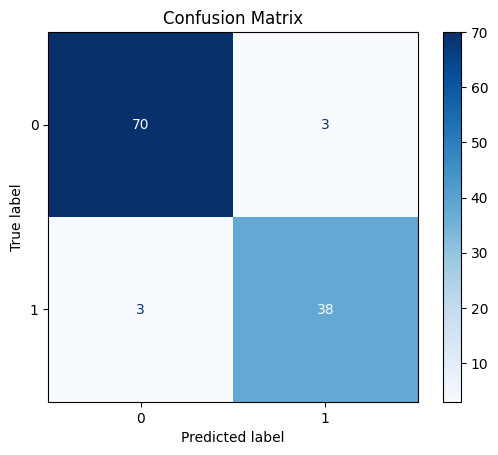

-----------------------------------------------------------------------------------------------------------------------------


In [228]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
models = [
    HistGradientBoostingClassifier(),
    RandomForestClassifier(max_depth=2, random_state=0),
    LogisticRegression(random_state=0, max_iter=1000),
    svm.SVC(kernel='linear')
    ]

for m in models:
    train(m, X_train, X_test, y_train, y_test)